In [222]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [223]:
df = pd.read_csv('winequality-red.csv')

In [224]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [225]:
df['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

So we can see in our target column total 6 classes are there and they are not properly balanced 

In [226]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

fixed acidity
7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.5     1
13.8     1
13.4     1
4.7      1
5.5      1
Name: count, Length: 96, dtype: int64


volatile acidity
0.600    47
0.500    46
0.430    43
0.590    39
0.360    38
         ..
1.035     1
0.565     1
1.130     1
1.115     1
1.090     1
Name: count, Length: 143, dtype: int64


citric acid
0.00    132
0.49     68
0.24     51
0.02     50
0.26     38
       ... 
0.72      1
0.62      1
0.75      1
1.00      1
0.78      1
Name: count, Length: 80, dtype: int64


residual sugar
2.00     156
2.20     131
1.80     129
2.10     128
1.90     117
        ... 
4.25       1
2.85       1
3.45       1
2.35       1
13.90      1
Name: count, Length: 91, dtype: int64


chlorides
0.080    66
0.074    55
0.076    51
0.078    51
0.084    49
         ..
0.108     1
0.148     1
0.143     1
0.222     1
0.230     1
Name: count, Length: 153, dtype: int64


free sulfur dioxide
6.0     138
5.0     104
10.0     79
15.0     78
12

In [227]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Here no null values are present 

In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


all datatypes are in numeric form. that is very good for our model

In [229]:
df.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

In [230]:
df.nunique().to_frame('unique values')

,unique values
fixed acidity,96
volatile acidity,143
citric acid,80
residual sugar,91
chlorides,153
free sulfur dioxide,60
total sulfur dioxide,144
density,436
pH,89
sulphates,96


In [231]:
df.shape

(1599, 12)

In [232]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


from this statistical summary we can say that in fixed_acidity,residual_sugar,free_sulfur_dioxide,total_sulfur_dioxide there may be chance of having outliers.
and also skewness is present but they are negligible

In [1]:
#checking the correlation 

In [233]:
cor = df.corr()
cor

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [234]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

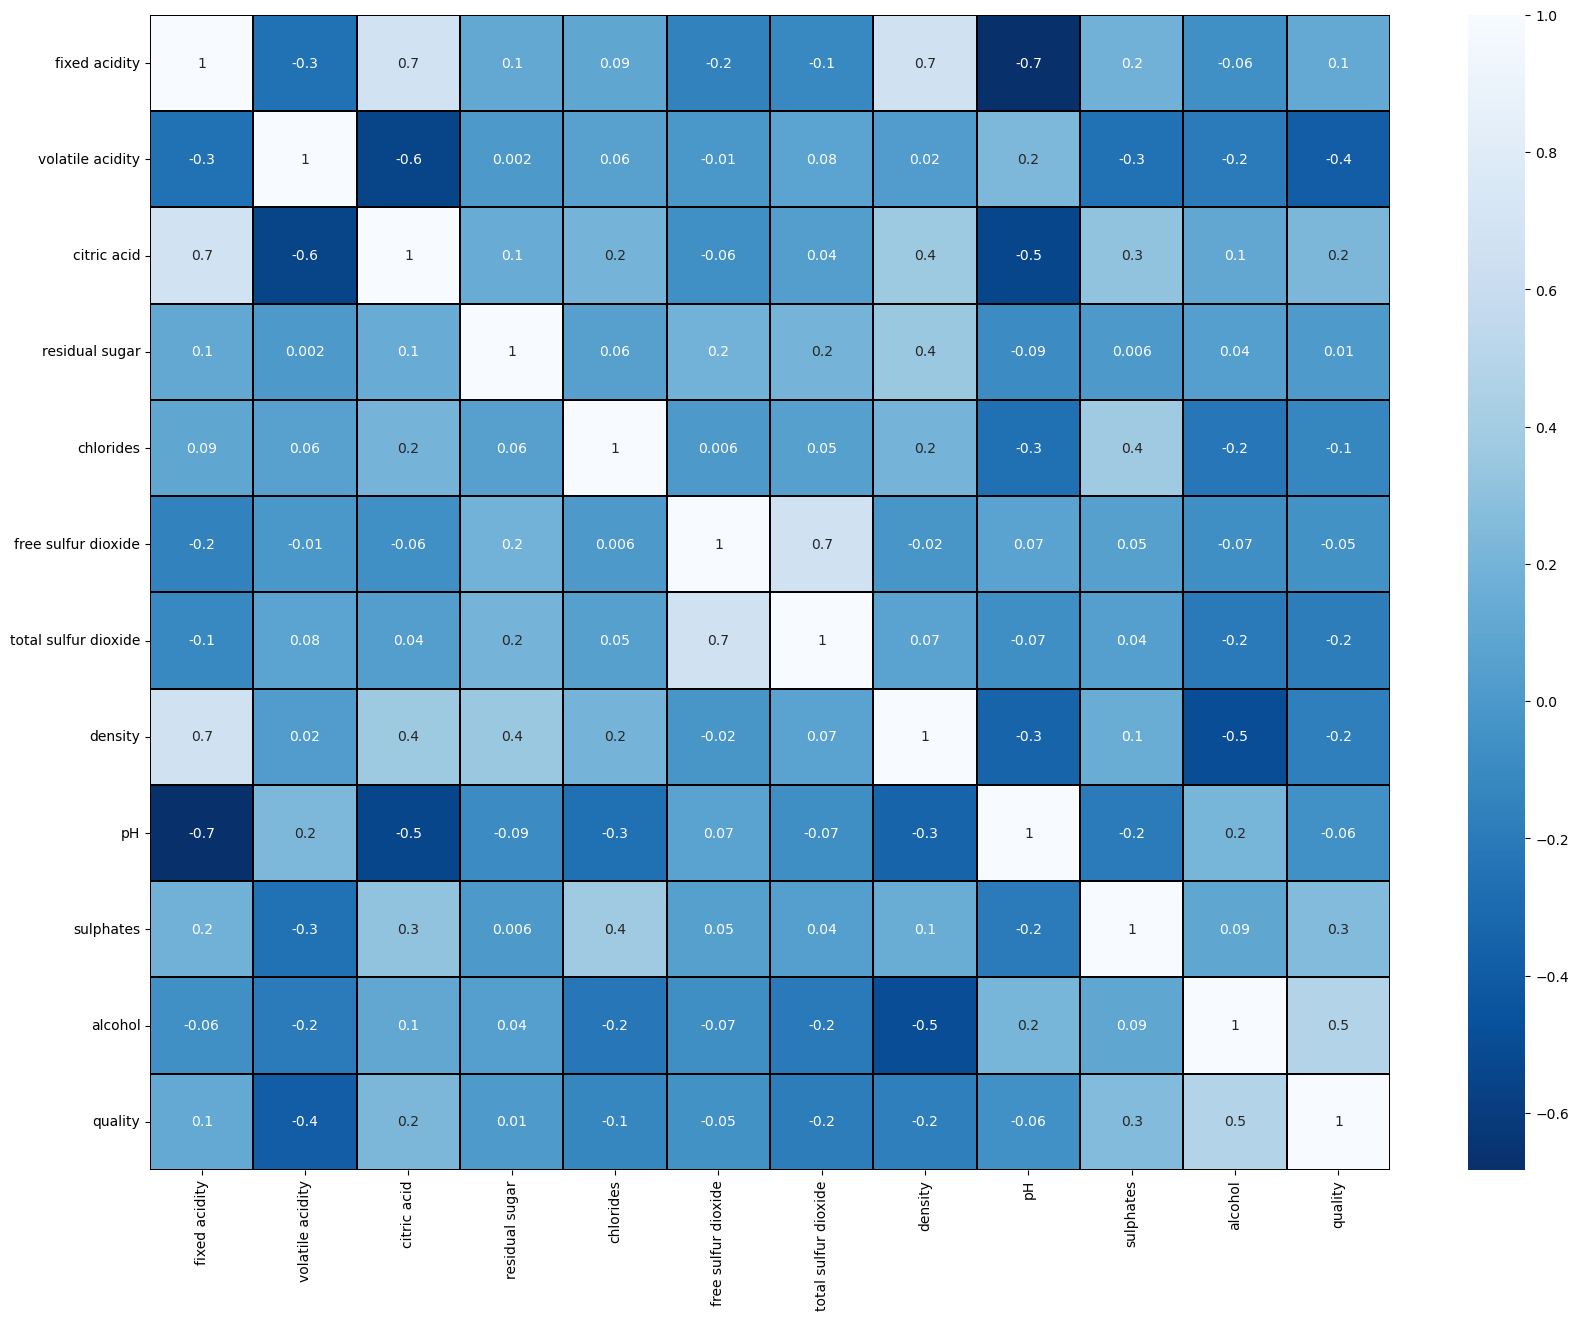

In [235]:
# visualization of correlation by heatmap 
plt.figure(figsize=(20,15))
sns.heatmap(cor,linewidths = .1,fmt='.1g',linecolor = 'black',annot = True,cmap = 'Blues_r')
plt.yticks(rotation =0)
plt.show()

from correlation we can say that residual_sugar,pH and free_sulfur_dioxide has very less correlation with target variable

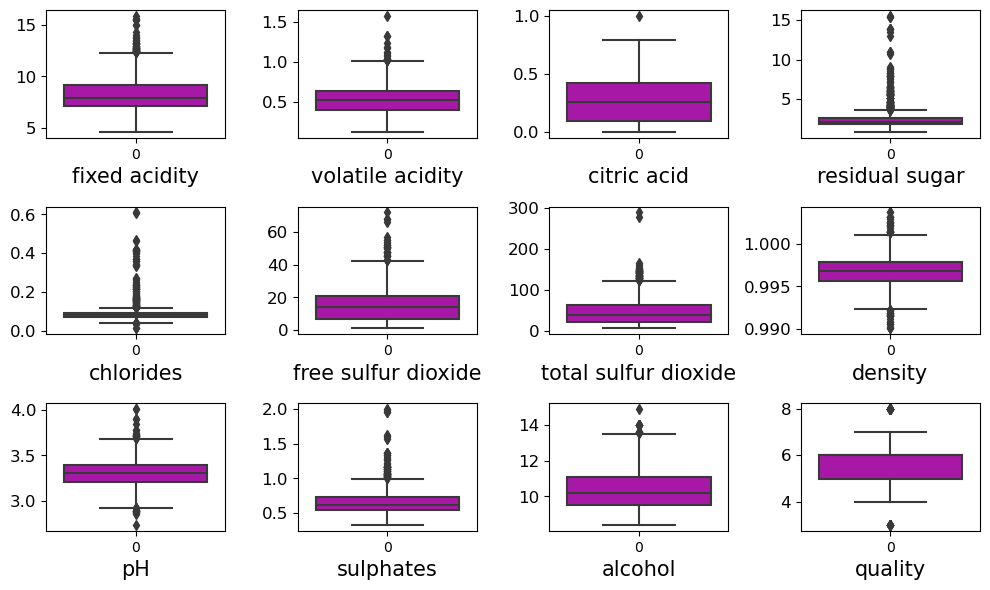

In [236]:
# Lets check the outliers by plotting the boxplot
plt.figure(figsize=(10,6),facecolor='white')
plotnumber =1
for col in df.columns:
    if plotnumber <= 12:
        ax = plt.subplot(3,4,plotnumber)
        sns.boxplot(df[col],color = 'm')
        plt.xlabel(col,fontsize=15)
        plt.yticks(rotation =0,fontsize=12)
    plotnumber += 1
plt.tight_layout()

As we can see that there are lots of outliers are present in most of the columns. we need to take care of it.

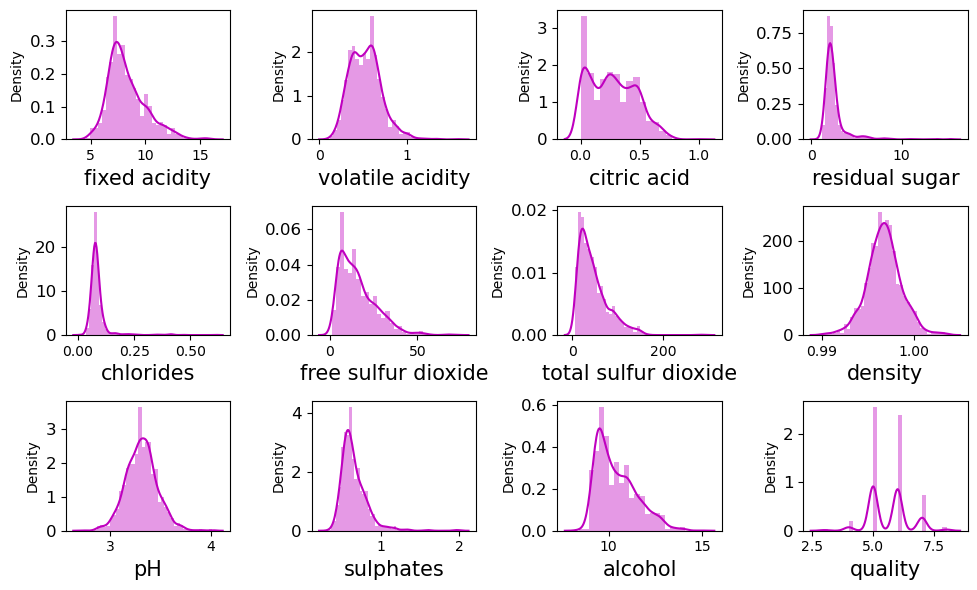

In [237]:
# Lets check the outliers by plotting the boxplot
plt.figure(figsize=(10,6),facecolor='white')
plotnumber =1
for col in df.columns:
    if plotnumber <= 12:
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(df[col],color = 'm')
        plt.xlabel(col,fontsize=15)
        plt.yticks(rotation =0,fontsize=12)
    plotnumber += 1
plt.tight_layout()

most of the columns has skewness so we need to remove the skewness otherwise our model will be biased

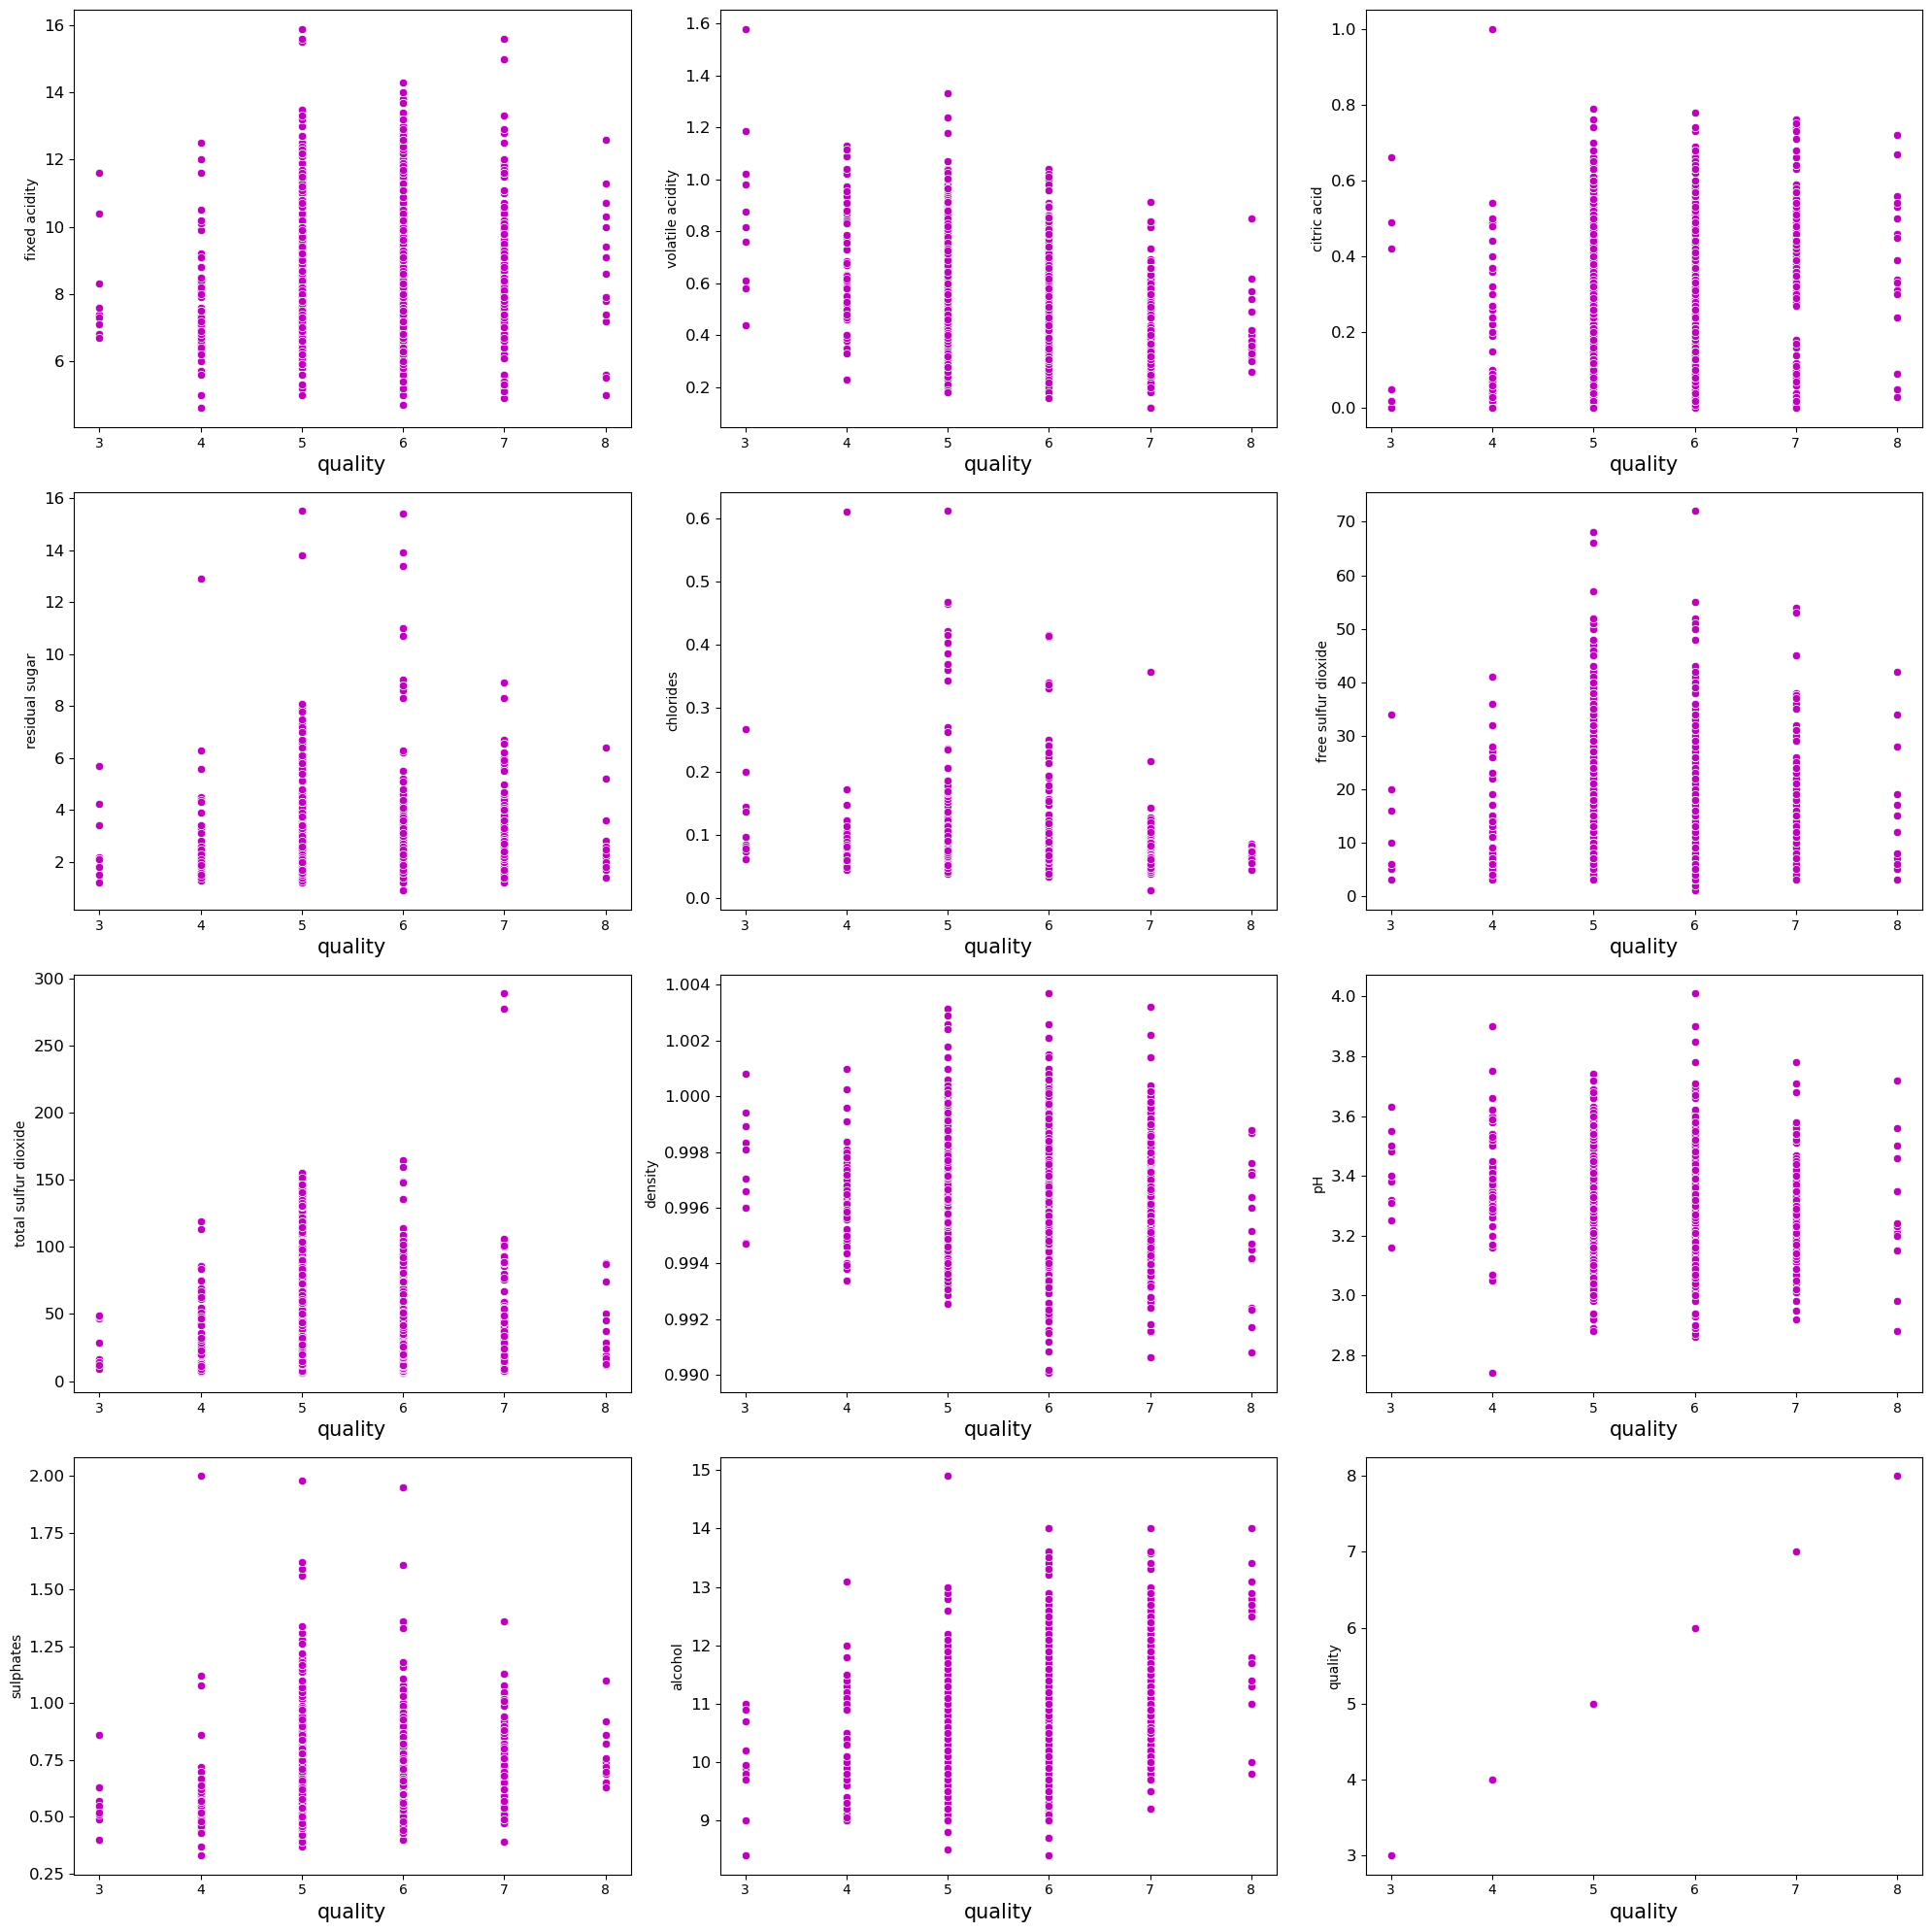

In [238]:
# Lets check the outliers by plotting the boxplot
plt.figure(figsize=(20,20),facecolor='white')
plotnumber =1
for col in df.columns:
    if plotnumber <= 12:
        ax = plt.subplot(4,3,plotnumber)
        sns.scatterplot(y=df[col],x=df['quality'],data=df,color = 'm')
        plt.xlabel('quality',fontsize=15)
        plt.yticks(rotation =0,fontsize=12)
    plotnumber += 1
plt.tight_layout()

<Axes: xlabel='quality', ylabel='residual sugar'>

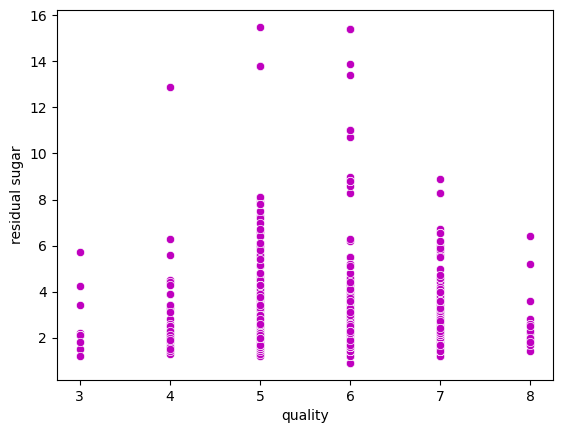

In [239]:
sns.scatterplot(y=df['residual sugar'],x=df['quality'],data=df,color = 'm')

In [240]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

['fixed acidity','volatile acidity','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','sulphates','alcohol'] these columns has skewness present. So we have to remove this skewness

In [241]:
a=['fixed acidity','volatile acidity','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','sulphates','alcohol']

In [2]:
# I am running a loop to remove the skewness all together by using cuberoot technique

In [242]:
for i in a:
    df[i]=np.cbrt(df[i])

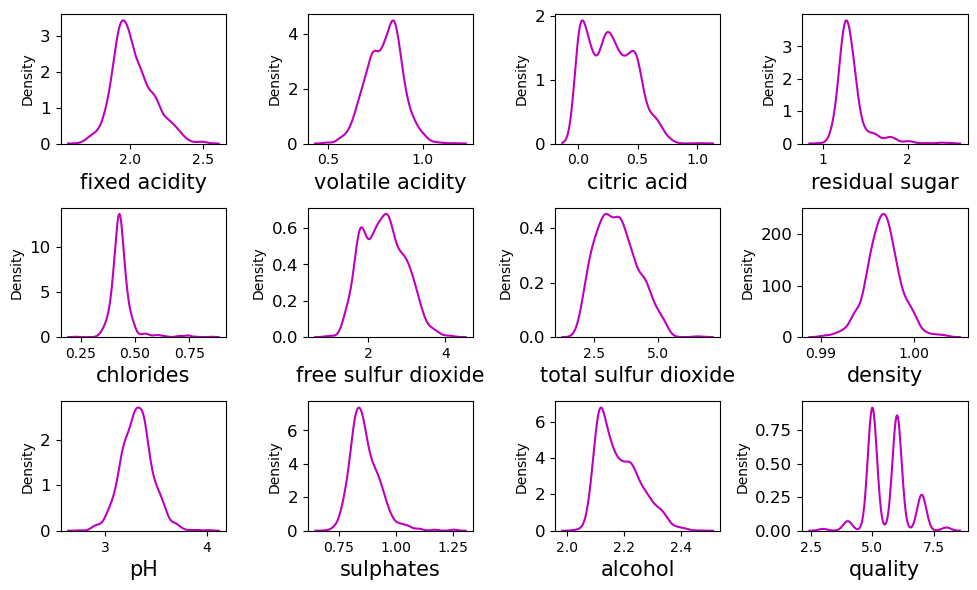

In [243]:
# Lets check the outliers by plotting the boxplot
plt.figure(figsize=(10,6),facecolor='white')
plotnumber =1
for col in df.columns:
    if plotnumber <= 12:
        ax = plt.subplot(3,4,plotnumber)
        sns.kdeplot(df[col],color = 'm')
        plt.xlabel(col,fontsize=15)
        plt.yticks(rotation =0,fontsize=12)
    plotnumber += 1
plt.tight_layout()

Now we can see that there are almost no skewness present in our columns

In [244]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [245]:
b=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

Now lets time to remove the outliers.
I am using zscore method to remove the outliers

In [246]:
from scipy.stats import zscore

In [247]:
curr=df[b]
z=np.abs(zscore(curr))

In [248]:
df_new=df[(z<3).all(axis=1)]
df_new

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1.948695,0.887904,0.00,1.238562,0.423582,2.223980,3.239612,0.99780,3.51,0.824257,2.110454,5
1,1.983192,0.958284,0.00,1.375069,0.461044,2.924018,4.061548,0.99680,3.20,0.879366,2.139975,5
2,1.983192,0.912581,0.04,1.320006,0.451436,2.466212,3.779763,0.99700,3.26,0.866239,2.139975,5
3,2.237378,0.654213,0.56,1.238562,0.421716,2.571282,3.914868,0.99800,3.16,0.833955,2.139975,6
4,1.948695,0.887904,0.00,1.238562,0.423582,2.223980,3.239612,0.99780,3.51,0.824257,2.110454,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,1.837091,0.843433,0.08,1.259921,0.448140,3.174802,3.530348,0.99490,3.45,0.833955,2.189760,5
1595,1.806969,0.819321,0.10,1.300591,0.395789,3.391211,3.708430,0.99512,3.52,0.912581,2.237378,6
1596,1.846915,0.798957,0.13,1.320006,0.423582,3.072317,3.419952,0.99574,3.42,0.908560,2.223980,6
1597,1.806969,0.864012,0.12,1.259921,0.421716,3.174802,3.530348,0.99547,3.57,0.892112,2.168703,5


In [249]:
df=df_new

In [250]:
df['quality'].value_counts()

quality
5    638
6    594
7    182
4     50
8     16
3      8
Name: count, dtype: int64

Changing into binary class as per problem statement. 

In problem statement there mentioned "What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.
This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the AUC valu"t 

In [3]:
# I am using map to convert from multiclass to binary class 

In [251]:
df['quality'] = df['quality'].map({3 : 0, 4 :0, 5: 0,
                                      6: 0, 7: 1, 8: 1})

In [252]:
df['quality'].value_counts()

quality
0    1290
1     198
Name: count, dtype: int64

its converted into 0 & 1

In [253]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

splitting dataset into x & y. x=input variables    and y=target variable

In [4]:
#I am using standard scaler to scaled our data just to change it from random distribution to normal distribution

In [254]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.523496,0.998750,-1.381982,-0.618142,-0.216913,-0.303493,-0.184771,0.616263,1.370388,-0.615388,-1.019164
1,-0.260372,1.784554,-1.381982,0.369872,0.902187,1.030653,0.874589,0.041824,-0.814654,0.334872,-0.595271
2,-0.260372,1.274267,-1.173185,-0.028664,0.615165,0.158157,0.511408,0.156712,-0.391742,0.108522,-0.595271
3,1.678394,-1.610447,1.541175,-0.618142,-0.272658,0.358401,0.685539,0.731151,-1.096594,-0.448162,-0.595271
4,-0.523496,0.998750,-1.381982,-0.618142,-0.216913,-0.303493,-0.184771,0.616263,1.370388,-0.615388,-1.019164
...,...,...,...,...,...,...,...,...,...,...,...
1483,-1.374746,0.502220,-0.964388,-0.463551,0.516724,1.508603,0.189947,-1.049609,0.947477,-0.448162,0.119598
1484,-1.604495,0.233012,-0.859989,-0.169185,-1.047194,1.921040,0.419469,-0.923232,1.440873,0.907602,0.803360
1485,-1.299813,0.005641,-0.703392,-0.028664,-0.216913,1.313284,0.047662,-0.567081,0.736021,0.838280,0.610978
1486,-1.604495,0.731994,-0.755591,-0.463551,-0.272658,1.508603,0.189947,-0.722179,1.793299,0.554659,-0.182760


In [255]:
df['quality'].value_counts()

quality
0    1290
1     198
Name: count, dtype: int64

So our target variable is not properly balanced. we have to balanced it

In [5]:
# Dropping residual sugar because it has very less correlation(almost .01) to the target variable

In [256]:
df.drop('residual sugar',axis=1,inplace=True)

using SMOTE method to balance

In [257]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x1, y1 = SM.fit_resample(x, y)

In [187]:
y1.value_counts()

quality
0    1290
1    1290
Name: count, dtype: int64

Now it is properly balanced

In [188]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

I usually take random_state =42. because most of the times it gives good result.

Lets our model to decide which is the best value for random_state.
i am running a loop for 200 times to check the best fitted random_state. It will give the random_state where accuracy is maximum 

In [189]:
maxacc=0
maxrs=0
for i in range(200):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.2,random_state=i)
    RFC=RandomForestClassifier()
    RFC.fit(x_train,y_train)
    pred=RFC.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxacc:
        maxacc=acc
        maxrs=i
print('best acc :',maxacc,  'random_state :',maxrs)    

best acc : 0.9767441860465116 random_state : 161


In [190]:
g=pd.DataFrame()
g['test']=y_test
g['pred']=pred
g

,test,pred
1320,0,0
1067,0,0
598,0,0
749,0,0
1124,0,0
...,...,...
1799,1,1
2042,1,1
661,0,0
2274,1,1


In [6]:
#splitting our data as per given random_state

In [191]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.2,random_state=maxrs)

In [192]:
x_train.shape

(2064, 11)

In [193]:
y_train.shape

(2064,)

In [194]:
x_test.shape

(516, 11)

In [195]:
y_test.shape

(516,)

Ok we are all set Lets build our model.

I am importing all classification models and create their objects 

In [196]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

In [197]:
RFC=RandomForestClassifier()
ET=ExtraTreesClassifier()
LR=LogisticRegression()
svc=SVC()
GBC=GradientBoostingClassifier()
ADC=AdaBoostClassifier()
BC=BaggingClassifier()
DTC=DecisionTreeClassifier()
KNN=KNeighborsClassifier()
MNB=MultinomialNB()
GNB=GaussianNB()


In [7]:
# Now I make a list of all objects of algorithmns

In [198]:
loop = [RFC,ET,LR,svc,GBC,ADC,BC,DTC,KNN,GNB]

In [199]:
from sklearn.model_selection import cross_val_score

In [8]:
# Now I am running a loop for all algorithmns and check which model performs better 

In [200]:
from sklearn.metrics import roc_auc_score

In [201]:
for i in loop:
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    print('This is for :',i)
    print('accuracy will be :',accuracy_score(y_test,pred))
    print('confusion matrix will be :','\n')
    print(confusion_matrix(y_test,pred))
    print('classification report will be :','\n')
    print(classification_report(y_test,pred))
    
    score= cross_val_score(i,x,y,cv=10,scoring='roc_auc')
    print('Cross val score will be :',score)
    print('Mean cv :',score.mean())
    print('Difference between cv and accuracy_score will be :',accuracy_score(y_test,pred)-score.mean())
    print('\n')
    
    

This is for : RandomForestClassifier()
accuracy will be : 0.9709302325581395
confusion matrix will be : 

[[246  10]
 [  5 255]]
classification report will be : 

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       256
           1       0.96      0.98      0.97       260

    accuracy                           0.97       516
   macro avg       0.97      0.97      0.97       516
weighted avg       0.97      0.97      0.97       516

Cross val score will be : [0.83565891 0.89050388 0.86976744 0.87015504 0.94282946 0.79379845
 0.79127907 0.86492248 0.88494492 0.79090167]
Mean cv : 0.8534761321909425
Difference between cv and accuracy_score will be : 0.11745410036719695


This is for : ExtraTreesClassifier()
accuracy will be : 0.9748062015503876
confusion matrix will be : 

[[246  10]
 [  3 257]]
classification report will be : 

              precision    recall  f1-score   support

           0       0.99      0.96      0.97       256

So we can see that ExtraTreesClassifier has the best result. so this is our best model

Let's do the hyper parameter tuning by using GridSearchCv 

In [202]:
from sklearn.model_selection import GridSearchCV

In [213]:
parameters = {'n_estimators':[100,150,200],'criterion':['gini','entropy','log_loss'],'n_jobs':[-1],'max_leaf_nodes':[2,4,5,None],'max_depth':[2,3,4,5,None]}

In [214]:
GCV = GridSearchCV(ExtraTreesClassifier(),parameters,cv=5)

In [215]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 4, 5, None],
                         'max_leaf_nodes': [2, 4, 5, None],
                         'n_estimators': [100, 150, 200], 'n_jobs': [-1]})

So after tuning these all are the best parameters

In [216]:
GCV.best_params_

{'criterion': 'log_loss',
 'max_depth': None,
 'max_leaf_nodes': None,
 'n_estimators': 150,
 'n_jobs': -1}

Now Lets build our final model and check the model accuracy

In [217]:
final_model = ExtraTreesClassifier(criterion = "log_loss",max_depth=None,max_leaf_nodes=None,n_estimators=150,n_jobs=-1)
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

97.09302325581395


So our model is 97% accurate and it is very less overfitted

In [9]:
#Plotting Roc_auc plot for our model

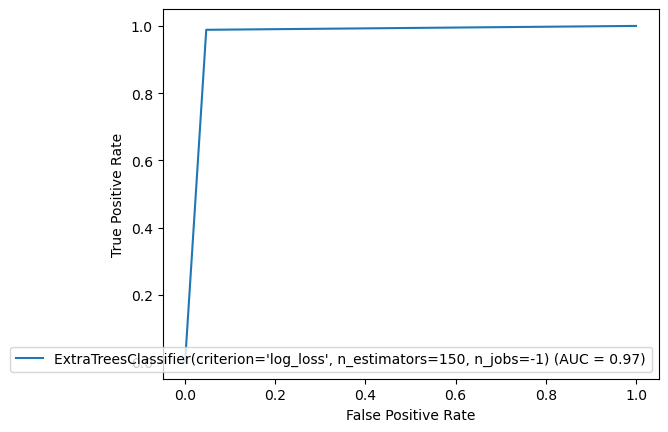

In [218]:
from sklearn import metrics
fpr,tpr,thresolds=metrics.roc_curve(y_test,pred)
roc_auc=metrics.auc(fpr,tpr)
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=final_model)
display.plot()

In [220]:
from sklearn.metrics import roc_auc_score
auc_score=roc_auc_score(y_test,pred)
auc_score

0.9707932692307693

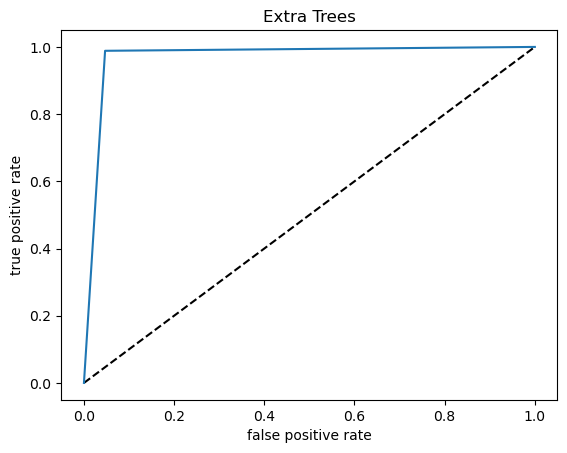

In [258]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='ExtraTreesClassifier')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('Extra Trees')
plt.show()